In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [176]:
#loading data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [177]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Understanding problem statement

In [178]:
# Describing the columns

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



In [179]:
# problem statement

Here we have a supervised machine learning problem based on classification algorithms/models.

The target variable is Survived, and all other variables are features/predictors

# Data exploration and Cleaning; feature engineering and selection

In [180]:
# let’s set Passenger id as index, as this is unique identifier for each passenger
# this will also allow to check for duplicates, as it could have hindered duplicates(being unique for each column)

In [181]:
df0 = df.set_index('PassengerId')

In [182]:
df0

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [183]:
#removing unnecessary columns

Columns Name and Ticket are just other form of Id, as each person(or a family) should normally have one ticket. Also, the port of embarkation doesn’t have importance here, since rules are the same when booking tickets. So, we will remove them.

In [184]:
df1 = df0.drop(['Name', 'Ticket', 'Embarked'], axis = 1)

In [185]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN
2,1,1,female,38.0,1,0,71.2833,C85
3,1,3,female,26.0,0,0,7.9250,NaN
4,1,1,female,35.0,1,0,53.1000,C123
5,0,3,male,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN
888,1,1,female,19.0,0,0,30.0000,B42
889,0,3,female,NaN,1,2,23.4500,NaN


In [186]:
df1.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN
2,1,1,female,38.0,1,0,71.2833,C85
3,1,3,female,26.0,0,0,7.9250,NaN
4,1,1,female,35.0,1,0,53.1000,C123
5,0,3,male,35.0,0,0,8.0500,NaN
6,0,3,male,NaN,0,0,8.4583,NaN
7,0,1,male,54.0,0,0,51.8625,E46
8,0,3,male,2.0,3,1,21.0750,NaN
9,1,3,female,27.0,0,2,11.1333,NaN


In [187]:
df1.tail(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
872,1,1,female,47.0,1,1,52.5542,D35
873,0,1,male,33.0,0,0,5.0000,B51 B53 B55
874,0,3,male,47.0,0,0,9.0000,NaN
875,1,2,female,28.0,1,0,24.0000,NaN
876,1,3,female,15.0,0,0,7.2250,NaN
877,0,3,male,20.0,0,0,9.8458,NaN
878,0,3,male,19.0,0,0,7.8958,NaN
879,0,3,male,NaN,0,0,7.8958,NaN
880,1,1,female,56.0,0,1,83.1583,C50


From observing the 20 first and 20 last rows of the data, we can see that all passengers of the first class had their cabin number recorded while only 0 and 1 passenger from class 2 and 3 has its cabin number recorded.  


My learnings

1 - if at least one of the values contains decimal

a - if the number of unique values is very less than the number of entries/rows/observations, we will consider these values as classes and classify the variable as categorical 

b - they cannot be classified as integers

2 - if all values are numeric and none contains decimal value(s)

a - if the number of unique values is very close to the number of entries/rows/observations, we will classify the variable as float

b - if the number of unique values is very less than the number of entries/rows/observations, we will classify the variable as integer (not object) 

In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


We observe that there are 3 types of data(object, float and integer). But Survived and Pclass seem to be categorical data.

we also observe that the columns Age, and Cabin contain missing values.

In [189]:
# cross-checking data types
df1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
dtype: object

In [190]:
# cross-checking data types
df1.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
dtype: int64

- Pclass is confirmed as caategorical. it will be converted into object type

- SibSp and Parch should be kept integer as they are naturaly numeric discret values

- due to the low number of unique values, Age cannot be considered as float data type. It will be converted into integer as it is naturally numeric discret value type

- Fare has decimal values but very low number of unique values. So, it will be conveted into object data type.

In [191]:
# Converting data type of Pclass and Fare
df1['Pclass'] = df1['Pclass'].astype(object)


In [192]:
df1['Fare'] = df1['Fare'].astype(object)

In [193]:
df1.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare         object
Cabin        object
dtype: object

Before converting Age, we have to first remove the NaN

In [194]:
# filling null valies in the column Age
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [195]:
df1.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Cabin       147
dtype: int64

In [196]:
# converting data type of Age
df1['Age'] = df1['Age'].astype(int)

In [197]:
df1.dtypes

Survived     int64
Pclass      object
Sex         object
Age          int64
SibSp        int64
Parch        int64
Fare        object
Cabin       object
dtype: object

In [198]:
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

In [199]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7.25,NaN
2,1,1,female,38,1,0,71.2833,C85
3,1,3,female,26,0,0,7.925,NaN
4,1,1,female,35,1,0,53.1,C123
5,0,3,male,35,0,0,8.05,NaN
...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0,NaN
888,1,1,female,19,0,0,30.0,B42
889,0,3,female,29,1,2,23.45,NaN


In [200]:
df1['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

The obssevation of data showed that most of the missing values come from Pclass 2 and 3. If we fill nan with the mode, we will be mistakenly filling Pclass 2 and 3 with ' B96 B98' or 'C23 C25 C27', both which seem to be Cabin for Pclass 1. If we delete nan this will cause severe data lost

In [201]:
# let's remove Cabin column as it seems not to be a good feature

df2 = df1.drop('Cabin', axis = 1)

In [202]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22,1,0,7.25
2,1,1,female,38,1,0,71.2833
3,1,3,female,26,0,0,7.925
4,1,1,female,35,1,0,53.1
5,0,3,male,35,0,0,8.05
...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0
888,1,1,female,19,0,0,30.0
889,0,3,female,29,1,2,23.45


In [203]:
# checking for duplicate

df2.loc[df2.duplicated(), :]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
43,0,3,male,29,0,0,7.8958
48,1,3,female,29,0,0,7.75
77,0,3,male,29,0,0,7.8958
78,0,3,male,29,0,0,8.05
88,0,3,male,29,0,0,8.05
...,...,...,...,...,...,...,...
878,0,3,male,19,0,0,7.8958
879,0,3,male,29,0,0,7.8958
882,0,3,male,33,0,0,7.8958


In [204]:
# let's check the number of unique Name from df to see whether the above are really duplicates

df['Name'].value_counts()


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

We can confirm the above columns are not not actually duplicates(there are 891 unique names). But if we don’t change this effect, the model will consider them as duplicets and act wrongly.

In [205]:
# in order not to avoid the (false) duplicate effect on the model, let's add Name column 

df2['Name'] = df0.Name

In [206]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7.25,"Braund, Mr. Owen Harris"
2,1,1,female,38,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,female,26,0,0,7.925,"Heikkinen, Miss. Laina"
4,1,1,female,35,1,0,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,male,35,0,0,8.05,"Allen, Mr. William Henry"
...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0,"Montvila, Rev. Juozas"
888,1,1,female,19,0,0,30.0,"Graham, Miss. Margaret Edith"
889,0,3,female,29,1,2,23.45,"Johnston, Miss. Catherine Helen ""Carrie"""


In [207]:
df2.loc[df2.duplicated(), :]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name
PassengerId,,,,,,,,


In [208]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    object
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
 6   Fare      891 non-null    object
 7   Name      891 non-null    object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [209]:
df2.describe()

,Survived,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.544332,0.523008,0.381594
std,0.486592,13.013778,1.102743,0.806057
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,0.000000
75%,1.000000,35.000000,1.000000,0.000000
max,1.000000,80.000000,8.000000,6.000000


Visualising features and target, and their relationships

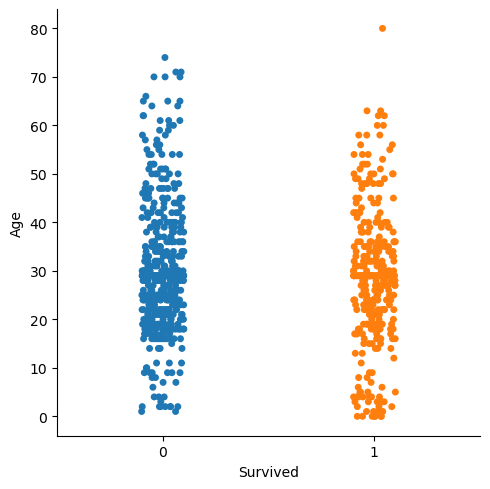

In [210]:
# across all ages, do people survived more?
sns.catplot(data=df2, x="Survived", y="Age")
plt.show()

We can see that there is no big gap between survivors and deads across all ages. But, people tend not to survive above 65 years  

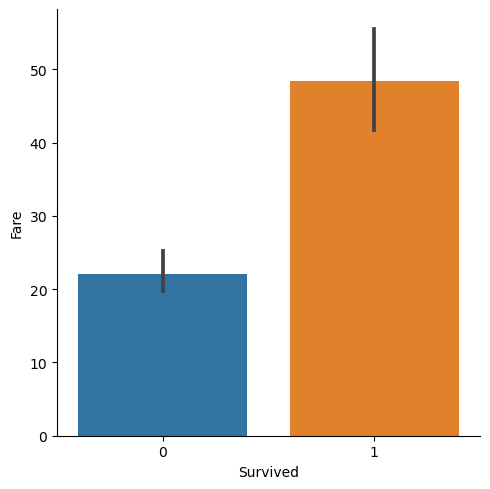

In [211]:
# do people who paid more fare have higher chance of survival?
sns.catplot(data=df2, x="Survived", y="Fare", kind = 'bar')
plt.show()

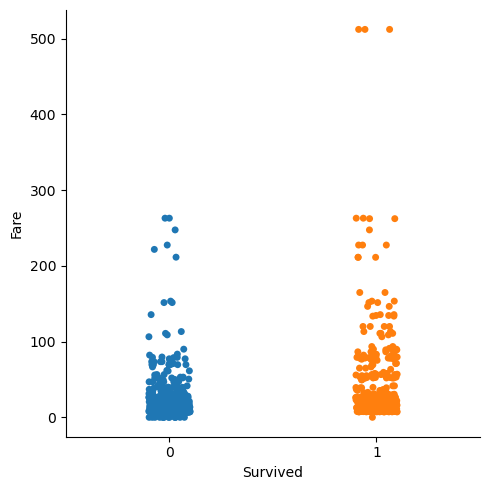

In [212]:
sns.catplot(data=df2, x="Survived", y="Fare")
plt.show()

We observe the people with higher fare tend to have higher chance of survival

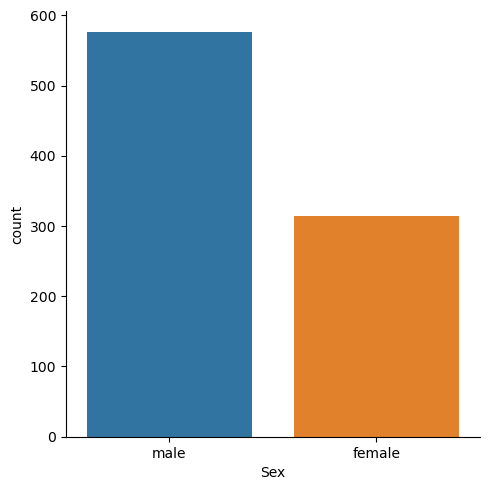

In [213]:
# how many male compared to female?
sns.catplot(data=df2, x="Sex", kind = 'count')
plt.show()

Male were nealy double of female

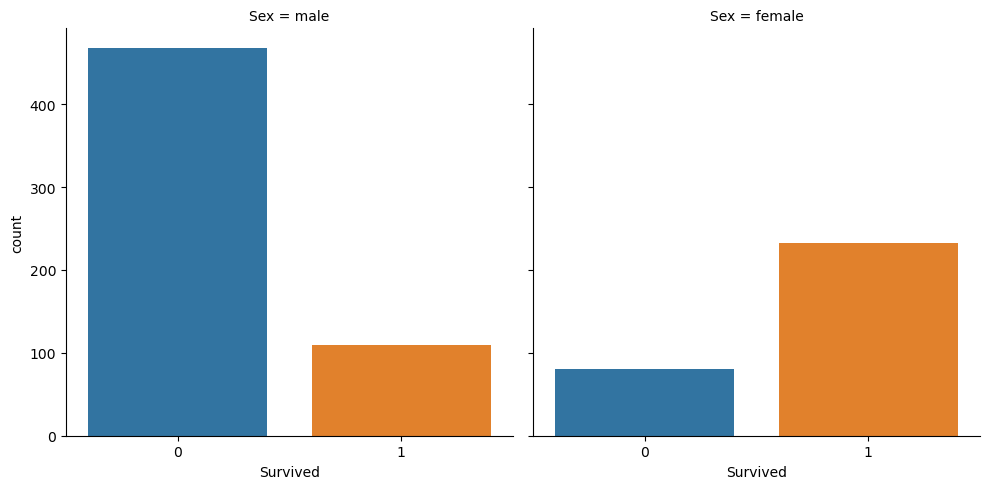

In [214]:
# who have the greater survival rate? male or female?
sns.catplot(data=df2, x="Survived", col="Sex", kind = 'count')
plt.show()

Male died 5 times than survived, while female survived 3 times than died

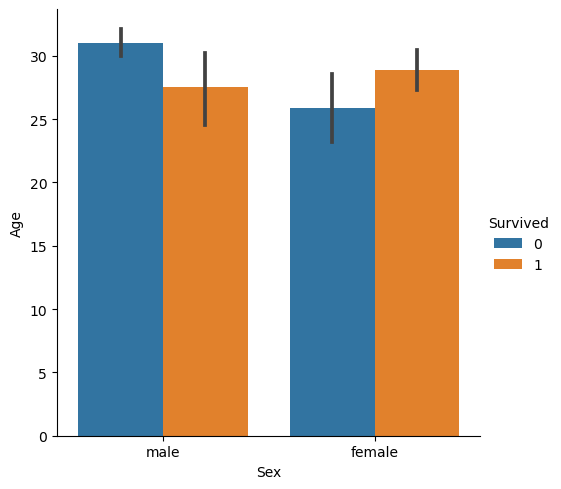

In [215]:
# how do male and female survival reates vary across all ages?
sns.catplot(data=df2, x="Sex", y="Age", hue = 'Survived', kind = 'bar')
plt.show()

More male died than survived across all ages while more female survived than died across all ages

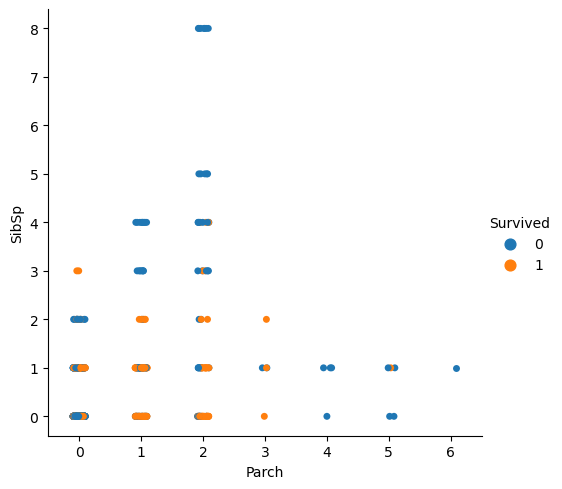

In [216]:
# how do SibSp and Parch influence chance of survival?
sns.catplot(data=df2, x="Parch", y="SibSp", hue = 'Survived', kind = 'strip')
plt.show()

People with high number SibSp hive lower chance of survival

People with high number Parch hive lower chance of survival

SibSp and Parch behave like class-variable, so it maybe better to convert them into object data type 

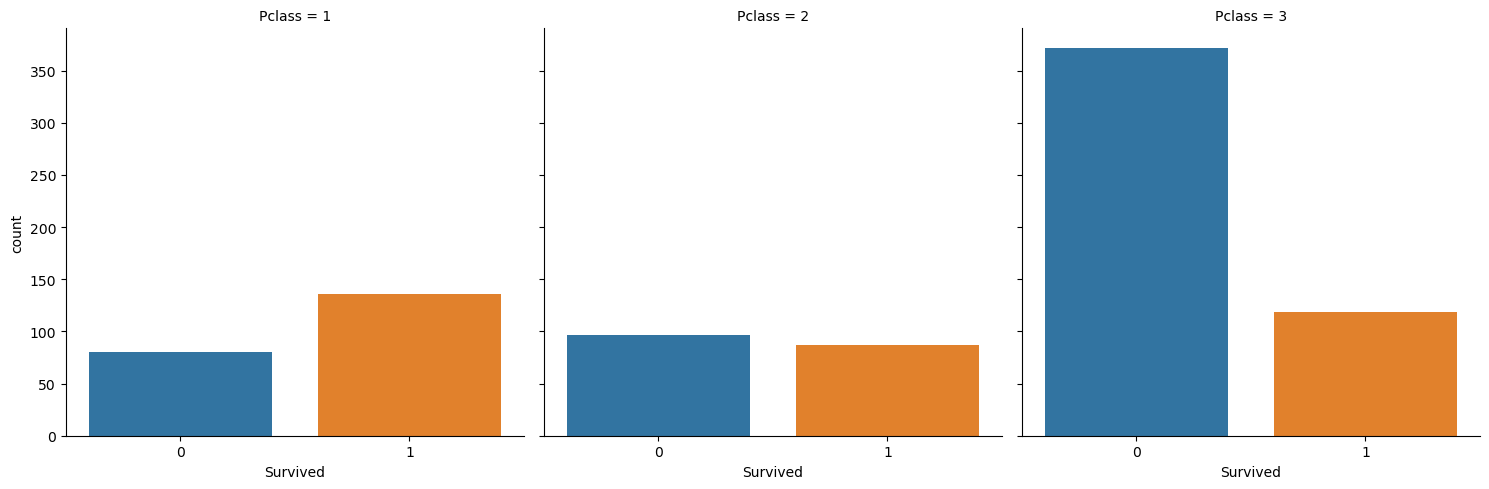

In [217]:
# Does passenger class influence the chance of survuval?
sns.catplot(data=df2, x="Survived", col="Pclass", kind = 'count')
plt.show()

Passemgers class 1 ahve the highest chance of survival while passengers class 3 have the lowest chance of survival

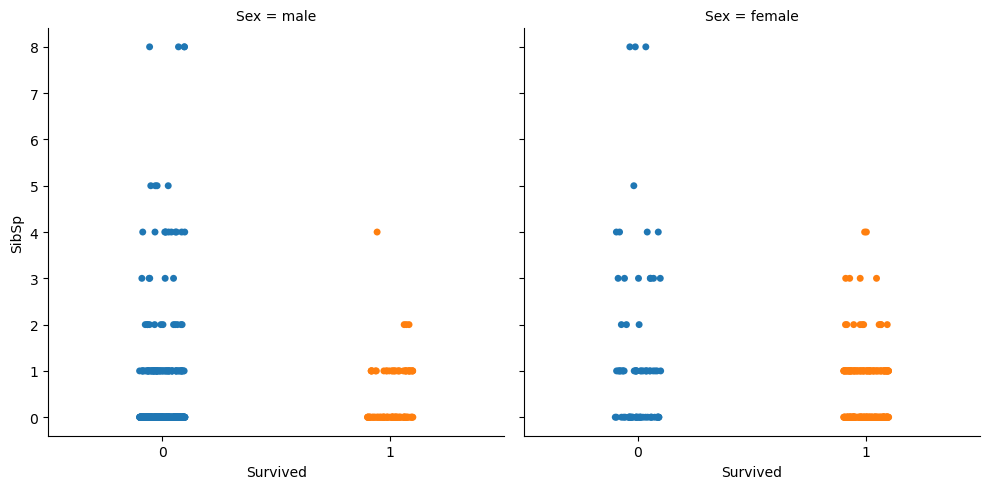

In [218]:
# effect of SibSp on survival across sex
sns.catplot(data=df2, x="Survived", y="SibSp", col="Sex")
plt.show()

higher number of SibSp negatively affects survival chance no matter the sex

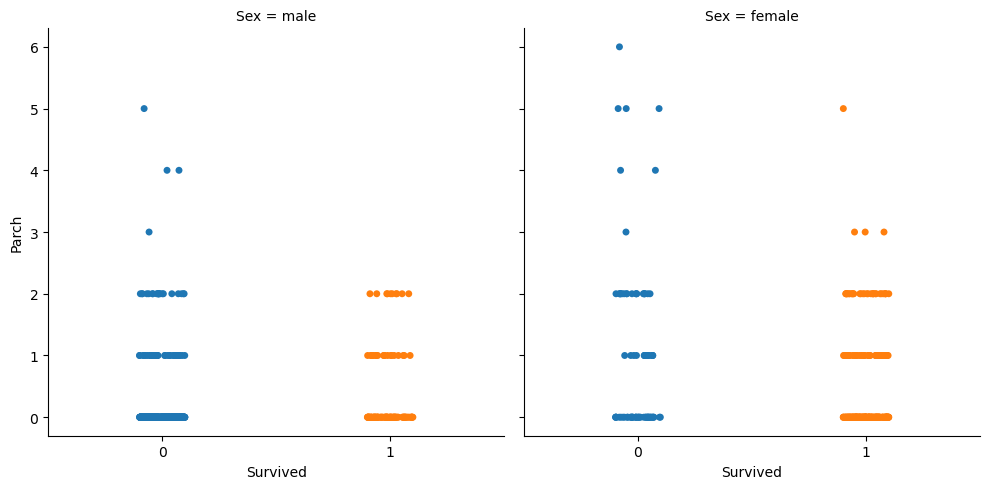

In [219]:
# effect of Parch on survival across sex
sns.catplot(data=df2, x="Survived", y="Parch", col="Sex")
plt.show()

higher number of Parch negatively affects survival chance no matter the sex

In [220]:
# let's convert SibSp and Parch into object type

df2['SibSp'] = df2['SibSp'].astype(object)

In [221]:

df2['Parch'] = df2['Parch'].astype(object)

In [222]:
df2.dtypes

Survived     int64
Pclass      object
Sex         object
Age          int64
SibSp       object
Parch       object
Fare        object
Name        object
dtype: object

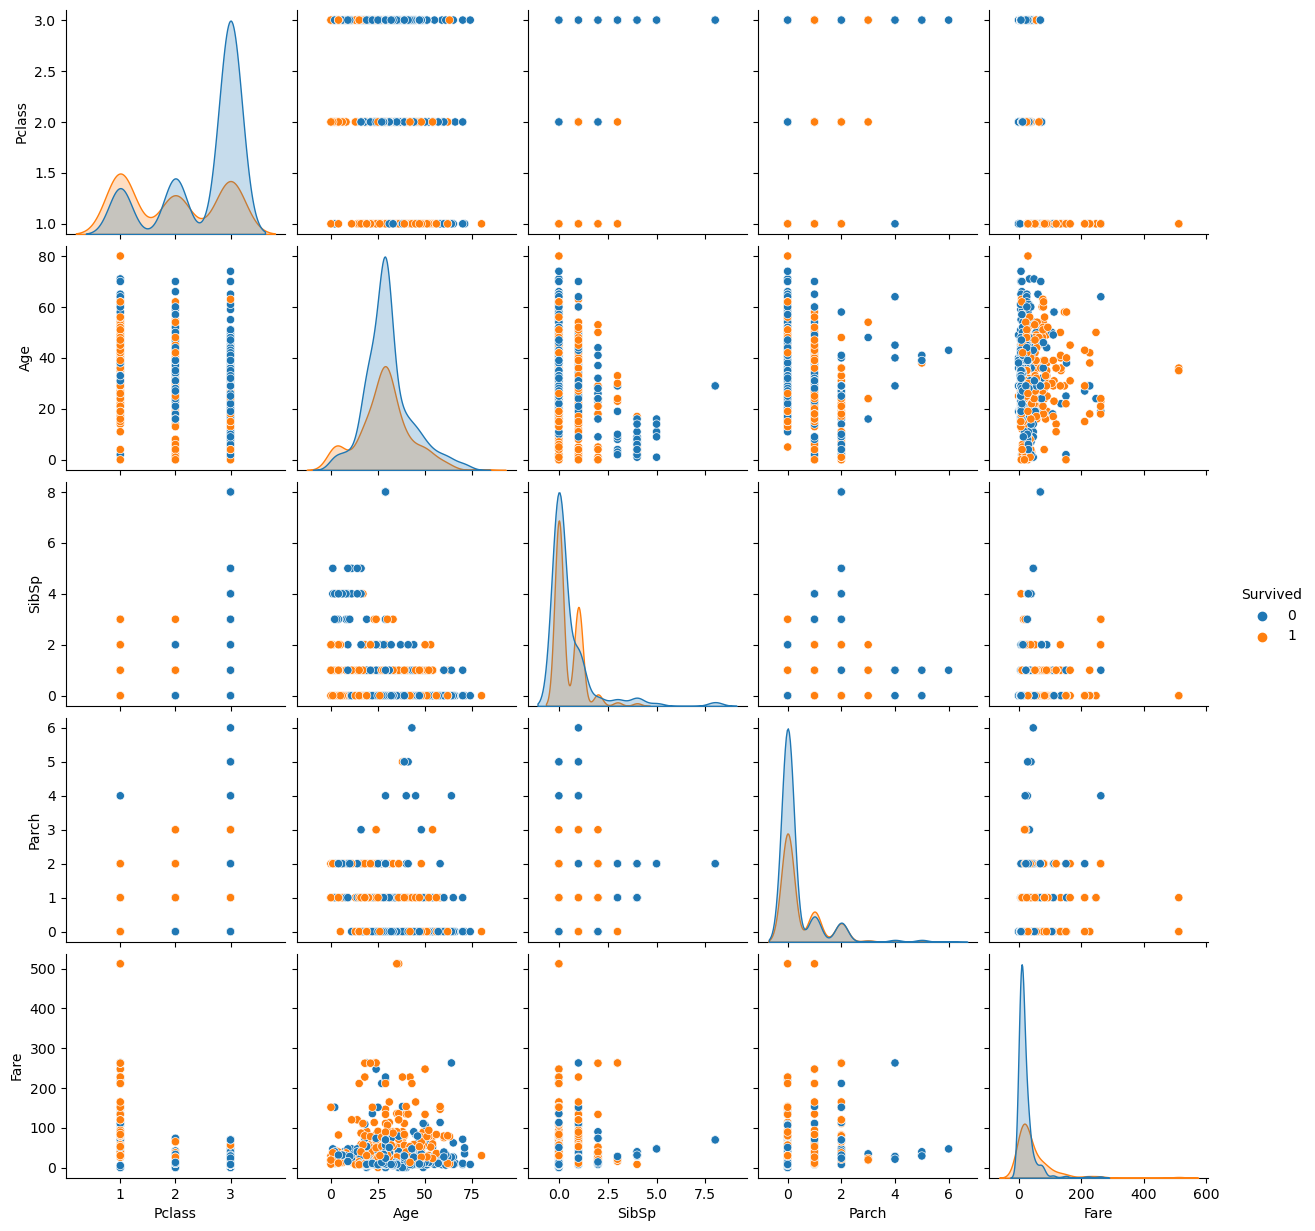

In [223]:
sns.pairplot(df2, hue = 'Survived')
plt.show()

In [224]:
df2['Age'].skew()

0.45956263424701577

Age is the only numerical feature and it is normally distributed 

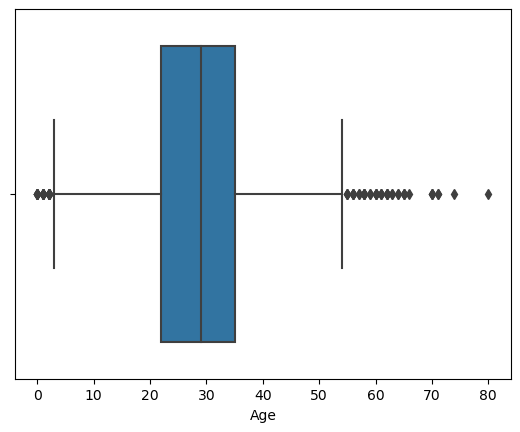

In [225]:
sns.boxplot(df2['Age'])
plt.show()

In [226]:
# removing outliers using zscore

from scipy.stats import zscore
col = df2['Age']
z = np.abs(zscore(col))

z


PassengerId
1      0.580044
2      0.650112
3      0.272505
4      0.419458
5      0.419458
         ...   
887    0.195620
888    0.810699
889    0.041851
890    0.272505
891    0.188804
Name: Age, Length: 891, dtype: float64

In [227]:
a = df2[(z<3)]

In [228]:
a

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7.25,"Braund, Mr. Owen Harris"
2,1,1,female,38,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,female,26,0,0,7.925,"Heikkinen, Miss. Laina"
4,1,1,female,35,1,0,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,male,35,0,0,8.05,"Allen, Mr. William Henry"
...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0,"Montvila, Rev. Juozas"
888,1,1,female,19,0,0,30.0,"Graham, Miss. Margaret Edith"
889,0,3,female,29,1,2,23.45,"Johnston, Miss. Catherine Helen ""Carrie"""


In [229]:
# data lost percentage

print((df2.shape[0]-a.shape[0])/df2.shape[0]*100)

0.7856341189674524


Good data lost

In [230]:
df2 = a

In [231]:
df2.dtypes

Survived     int64
Pclass      object
Sex         object
Age          int64
SibSp       object
Parch       object
Fare        object
Name        object
dtype: object

Encoding categorical variables

In [232]:
col = []
for i in df2.columns:
    if df2[i].dtypes == 'object':
        col.append(i)
col

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Name']

In [233]:
# encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
O = OrdinalEncoder()

for j in col:
    df2[j]= O.fit_transform(df2[j].values.reshape(-1,1))  
df2
  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name
PassengerId,,,,,,,,
1,0,2.0,1.0,22,1.0,0.0,18.0,106.0
2,1,0.0,0.0,38,1.0,0.0,206.0,186.0
3,1,2.0,0.0,26,0.0,0.0,41.0,348.0
4,1,0.0,0.0,35,1.0,0.0,188.0,268.0
5,0,2.0,1.0,35,0.0,0.0,43.0,15.0
...,...,...,...,...,...,...,...,...
887,0,1.0,1.0,27,0.0,0.0,85.0,542.0
888,1,0.0,0.0,19,0.0,0.0,153.0,298.0
889,0,2.0,0.0,29,1.0,2.0,131.0,408.0


Separating the target and features

In [234]:
# Separating features and target

x = df2.drop('Survived', axis = 1)

y = df2['Survived']


In [235]:
x.shape

(884, 7)

In [132]:
y.shape

(884,)

In [236]:
# check for class balanceness for y 

y.value_counts()

0    543
1    341
Name: Survived, dtype: int64

y classes are unbalanced

In [237]:
# let's use a resampling method to balance y.

! pip install imblearn
from imblearn.over_sampling import SMOTE

ST = SMOTE()
x1,y1 = ST.fit_resample(x,y)


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [238]:
y1.value_counts()

0    543
1    543
Name: Survived, dtype: int64

In [239]:
x=x1

In [240]:
y=y1

In [242]:
y.value_counts()

0    543
1    543
Name: Survived, dtype: int64

In [243]:
# standardise x
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
col = []
for i in x.columns:
    col.append(i)
x = pd.DataFrame(scaler.fit_transform(x), columns = col)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Name
0,0.895457,0.880317,-0.541727,0.510960,-0.510397,-1.313326,-1.313647
1,-1.467987,-1.193359,0.744912,0.510960,-0.510397,1.351818,-1.001727
2,0.895457,-1.193359,-0.220068,-0.534203,-0.510397,-0.987271,-0.370088
3,-1.467987,-1.193359,0.503667,0.510960,-0.510397,1.096645,-0.682008
4,0.895457,0.880317,0.503667,-0.534203,-0.510397,-0.958919,-1.668456
...,...,...,...,...,...,...,...
1081,-1.467987,-1.193359,-0.943802,-0.534203,0.537601,1.789247,0.169496
1082,0.895457,-1.193359,0.021177,-0.534203,-0.510397,-1.036163,0.608343
1083,0.895457,-1.193359,-0.943802,-0.534203,-0.510397,-1.150089,-0.578000
1084,0.895457,-0.404398,-0.541727,-0.534203,-0.510397,-1.171708,1.237535


In [244]:
# correlation

df2.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name
Survived,1.000000,-0.342511,-0.543261,-0.059052,-0.027590,0.081209,0.336010,-0.057969
Pclass,-0.342511,1.000000,0.137226,-0.332885,0.077627,0.018100,-0.722300,0.044988
Sex,-0.543261,0.137226,1.000000,0.066395,-0.121429,-0.244551,-0.268546,0.023611
Age,-0.059052,-0.332885,0.066395,1.000000,-0.256367,-0.176747,0.113858,0.071761
SibSp,-0.027590,0.077627,-0.121429,-0.256367,1.000000,0.422180,0.369915,-0.036735
Parch,0.081209,0.018100,-0.244551,-0.176747,0.422180,1.000000,0.362397,-0.049955
Fare,0.336010,-0.722300,-0.268546,0.113858,0.369915,0.362397,1.000000,-0.048285
Name,-0.057969,0.044988,0.023611,0.071761,-0.036735,-0.049955,-0.048285,1.000000


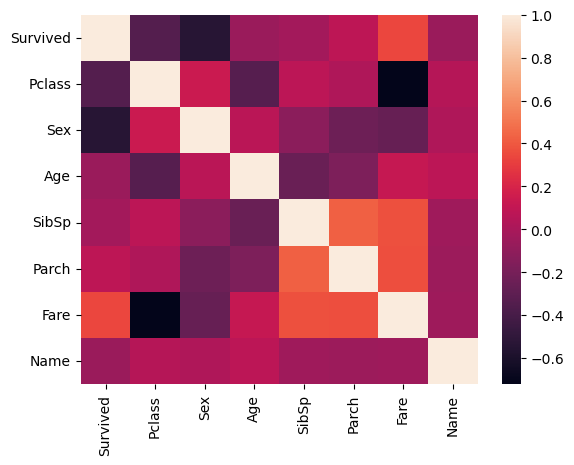

In [245]:
sns.heatmap(df2.corr())
plt.show()

Pclass and Fare are highly negatively correlated. this means, by adding the two variables in the model, the combined effects will produce 0 effect on the target. So, it is important to keep one as each of both have an effect on the target variable. In order to decide which to remove, we have to check variance inflation, because both have the same absolute value correlation with the target.

In [246]:
# finding variance inflation in each column
from statsmodels.stats.outliers_influence import variance_inflation_factor

z = []

for i in range(len(x.columns)):
    z.append(variance_inflation_factor(x.values, i))
Vif = pd.DataFrame(z)

Vif['Features'] = x.columns
Vif.rename({Vif.columns[0]: 'VIF Values'}, axis = 'columns', inplace = True)




In [247]:
Vif

,VIF Values,Features
0,3.829618,Pclass
1,1.114565,Sex
2,1.224987,Age
3,1.669070,SibSp
4,1.457160,Parch
5,4.507554,Fare
6,1.011419,Name


Fare has the highst VIF. So we will drop Fare

In [248]:
df2.drop('Fare', axis = 1, inplace = True)

In [249]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Name
PassengerId,,,,,,,
1,0,2.0,1.0,22,1.0,0.0,106.0
2,1,0.0,0.0,38,1.0,0.0,186.0
3,1,2.0,0.0,26,0.0,0.0,348.0
4,1,0.0,0.0,35,1.0,0.0,268.0
5,0,2.0,1.0,35,0.0,0.0,15.0
...,...,...,...,...,...,...,...
887,0,1.0,1.0,27,0.0,0.0,542.0
888,1,0.0,0.0,19,0.0,0.0,298.0
889,0,2.0,0.0,29,1.0,2.0,408.0


# Modelling

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import joblib
import pickle

Below I tried my own to find maximum accuracy but kept getting error. In order to complete the project, I just copy-pasted from fproject discussion. I will effort to build my own code after compelting this project

In [251]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('Best accuracy is: ', maxAccu, 'at randome state: ', maxRs)


Best accuracy is:  0.9079754601226994 at randome state:  47


In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 194)

In [253]:
# training the data on each algorithm and CV

L = LogisticRegression()
R = RandomForestClassifier()
E = ExtraTreesClassifier()
G = GradientBoostingClassifier()
A = AdaBoostClassifier()
B = BaggingClassifier()
S = SVC()

Mod = [L,R,E,G,A,B,S]

for model in Mod:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    acc = accuracy_score(y_test, pred_model)
    score = cross_val_score(model,x,y)
    print(accuracy_score(y_test, pred_model))
    print(confusion_matrix(y_test, pred_model))
    print(classification_report(y_test, pred_model))
    print(score)
    print(score.mean())
    print('The difference between accuracy score and cross validation score of ', model, 'is: ', accuracy_score(y_test, pred_model) - score.mean())
    print('\n')
    

0.8455882352941176
[[117  18]
 [ 24 113]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       135
           1       0.86      0.82      0.84       137

    accuracy                           0.85       272
   macro avg       0.85      0.85      0.85       272
weighted avg       0.85      0.85      0.85       272

[0.77522936 0.81105991 0.76497696 0.83870968 0.83410138]
0.8048154568130894
The difference between accuracy score and cross validation score of  LogisticRegression() is:  0.04077277848102823


0.8823529411764706
[[120  15]
 [ 17 120]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       135
           1       0.89      0.88      0.88       137

    accuracy                           0.88       272
   macro avg       0.88      0.88      0.88       272
weighted avg       0.88      0.88      0.88       272

[0.76605505 0.8202765  0.81105991 0.94009217 0.91705069]
0.8509068617

Our best model is SVC() because the it has the least difference

In [256]:
# hyperperameter tuning 

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,1.0,2.0],
             'random_state':[20,100,500],
             'degree':[0,1,2],
             'max_iter':[-1,0,1],
             'coef0':[0.0,0.1]}

In [257]:
SearchCV = GridSearchCV(SVC(), param_grid = param_grid, cv = 5)
SearchCV.fit(x_train, y_train)
print('best estimator: ', SearchCV.best_estimator_)

best estimator:  SVC(C=0.5, degree=0, random_state=20)


In [258]:
my_model = SVC(C=0.5, degree=0, random_state=20)
my_model.fit(x_train, y_train)
pred = my_model.predict(x_test)
print('Acuuracy Score=', (accuracy_score(y_test, pred))*100) 


Acuuracy Score= 83.82352941176471


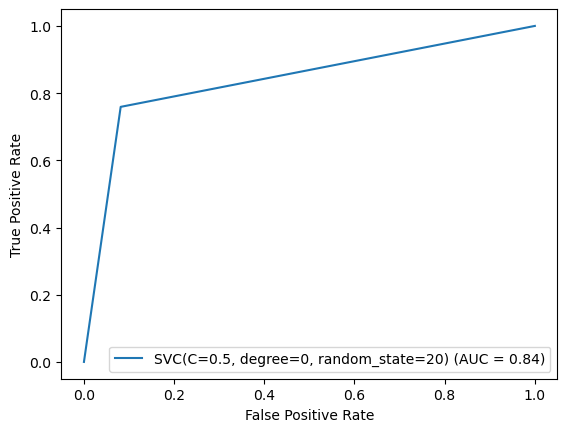

In [261]:
# ROC curve
a, b, thresholds = metrics.roc_curve(y_test, pred)
f = metrics.auc(a, b)
display = metrics.RocCurveDisplay(fpr=a, tpr=b, roc_auc = f, estimator_name = my_model)
display.plot()
plt.show()

In [262]:
pickle.dump(my_model, open('Titanic_Romuald.pkl', 'wb'))

In [263]:
saved_model = pickle.load(open('Titanic_Romuald.pkl', 'rb'))

In [264]:
saved_model.predict(x_test)

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1])

In [265]:
y_test

1019    1
266     1
781     0
789     0
435     1
       ..
515     1
338     1
153     0
1054    1
536     1
Name: Survived, Length: 272, dtype: int64

In [148]:
# tuning BaggingClassifier() (my own practice)
"""from sklearn.model_selection import GridSearchCV

param_grid = {'max_features':[1,2,3],
             'random_state':[20,100,500],
             'bootstrap':[True,False],
             'n_jobs':[-1,0,1],
             'n_estimators':[20,50,100,150]}"""

In [266]:
"""SearchCV = GridSearchCV(BaggingClassifier(), param_grid = param_grid, cv = 5)
SearchCV.fit(x_train, y_train)
print('best estimator: ', SearchCV.best_estimator_)"""

"SearchCV = GridSearchCV(BaggingClassifier(), param_grid = param_grid, cv = 5)\nSearchCV.fit(x_train, y_train)\nprint('best estimator: ', SearchCV.best_estimator_)"